# Prediction using Supervised ML (Task 1) - The Sparks Foundation 

Task 1:

Task is to predict a percentage of students based on the number of study hours. In this task, simple linear regression is used for the predictions as the data has only **Two Variables**.
1. Hours : Number of hours student studies 
2. Scores: Scores obtained by the student.

Linear Regression:

In simple words, Linear regression is a straight line that can predict any relationship between two points(variables). This is an statistical method that is commonly used for predictive analysis. 

There is two types of linear regression: Simple linear - Single independent variable is used for predicting the value of dependent variable. Multiple linear regression - Two or more independent variable is used for predicting the value of dependent variable.

In [1]:
#Importing all necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data

In [2]:
data = pd.read_csv("C:/Users/jeevi/OneDrive/Documents/spark/student_scores - student_scores.csv")

In [3]:
# printing the data
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Looking at the concise summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Looking at the statistical details of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Assumptions of Linear Regression

There are few assumptions for linear regression that can be checked in this task.
1. Two variables should be in a linear relationship (In this task we are using scatter plot to identify the relationship between the variables)
2. Variable should be normally distributed(Multivariate normal)

### Plotting the data

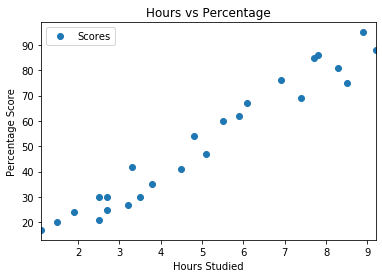

In [6]:
# Plotting the data gives betetr understanding of the distribution
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above ploting we can clearly see that there is a **Positive relationship** between two variables. That is the more hours a student studies, higher the score he/she will secure. 

### Splitting independent and dependent variable

Now we are splitting the data into independent variable(attributes) or dependent variable(labels)

In [7]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

### Splitting train and test data

Next step is to split the data into train and test where the model is fitted to train dataset and predicted using the test dataset. To split the data we are using train_test_split() method.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Training the model

In [9]:
# Importing the linear regression package from Scikit-Learn
from sklearn.linear_model import LinearRegression

In [10]:
# Assigning the linear regression function to variable (lm)
lm = LinearRegression(normalize = True)

In [11]:
# Training the model using training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

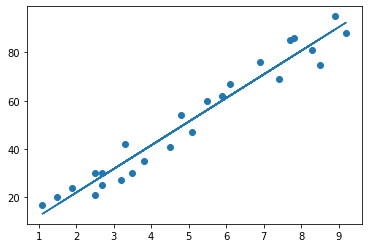

In [12]:
# Plotting the regression line
line = lm.coef_*x+lm.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Predictions using test data

In [13]:
# Predicting the scores using text data and saving it to a variable(predictions)
predictions = lm.predict( X_test)

In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


##### The main question is to predict the score if a student studies for 9.25 hrs/ day?

To find this we are assinging 9.25 to a variable names hours and passing it to the predict function.

In [15]:
hours = 9.25
pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


### Model evaluation

There are different methods to evaluate the model. In this task three metrics are used to evaluate the model.

1. MAE: Mean Absolute Error - This metrics shows whether the model is perfect predictor or not but does not show underperformance or overperformance of the model. If MAE is closer to 0 then the model is good predictor.

2. MSE: Mean Square Error - The square difference between the actual and predicted value before summing them all will give MSE value. MSE value can range beteen 0 to infinity. If the MSE value is close to 0 then the model is not a good predictor.

3. RMSE: Root Mean Square Error - RMSE can be used as an alternative metrics for MSE. Because MSE value can be bigger and interpretation can be harder. USing RMSE we can overcome interpretation issue. 

In [16]:
## Calculating MAE, MSE and RMSE
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.4197278080276545
MSE: 22.96509721270044
RMSE: 4.792191274636316


From the above metrics we can see that the model is doing a good predictions but it is not a perfect predictor. 

A simple linear regression model to predict the score based on the student study hours is successfully completed.

Thank you!!